In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
baselines = pd.read_csv(r"/Users/Debs/OneDrive - Nexus365/4YP/python/_storage/baselines/baselines_met.csv", index_col=0).rename(columns={"Q in single(µm3/s)": "baseline Q"}) # FOR MAC

In [62]:
def total_R(baselines,phi,alpha):
    C_ = alpha*(baselines.at[6,'Resistance for Q']/2)/phi**4  + (1-alpha)*(baselines.at[6,'Resistance for Q']/2)
    C_6 = (C_ + baselines.at[5,'Resistance for Q'] + baselines.at[7,'Resistance for Q'])/2
    C_65 = (C_6 + baselines.at[4,'Resistance for Q'] + baselines.at[8,'Resistance for Q'])/2
    C_654 = (C_65 + baselines.at[3,'Resistance for Q'] + baselines.at[9,'Resistance for Q'])/2
    C_6543 = (C_654 + baselines.at[2,'Resistance for Q'] + baselines.at[10,'Resistance for Q'])/2
    C_65432 = (C_6543 + baselines.at[1,'Resistance for Q'] + baselines.at[11,'Resistance for Q'])/2
    C_654321 = C_65432 + baselines.at[0,'Resistance for Q'] + baselines.at[12,'Resistance for Q']
    R_total = C_654321
    return R_total

In [63]:
alpha = 0.5
phi_FI = 0.153
p_drop = 0.5

In [64]:
p_in_init = 60
p_final = 15
p_diff_init = 60-15
p_diff_final = (60-15)*(1-p_drop)
Q_init = p_diff_init/total_R(baselines,1,alpha)
print('p diff init: ',p_diff_init)
print('p diff final: ',p_diff_final)

p diff init:  45
p diff final:  22.5


In [66]:
iters = 100
phi = np.zeros(iters)
phi_min = np.zeros(iters)
Q = np.zeros(iters)
Q_norm = np.zeros(iters)
R = np.zeros(iters)
phi[0]=1
phi_min[0]=0.6
# Q[0] = Q_init

In [67]:
for i in range(iters):
    R[i] = total_R(baselines,phi[i],alpha)
    Q[i] = p_diff_final/R[i]
    Q_norm[i] = Q[i]/Q_init
    phi_min[i] = 1-(alpha**0.25)*(1-phi_FI)*(1-Q_norm[i])
    if i == its-1:
        continue
    else:
        phi[i+1] = Q_norm[i]*(1-phi_min[i]) + phi_min[i]

In [74]:
print(Q_norm[-1])
print(phi[-1])

0.47453791512149995
0.8033433301148208


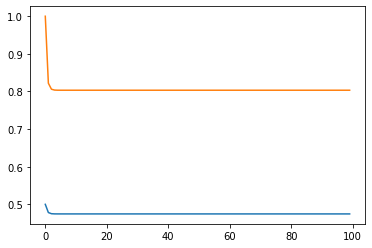

In [68]:
plt.plot(range(its),Q_norm)
plt.plot(range(its),phi)


In [55]:
def check_imag_roots_real(all_roots):
    counter = 0
    sols = 0
    for i in range(len(all_roots)):
        if all_roots[i].imag <= 10e-13 and all_roots[i].imag >= -10e-13:
            sols = all_roots[i].real
            counter += 1
    if counter != 1:
        print('Something seems wrong with the partial presure to Saturation cubic solver as not one solution is returned.')
    return sols

In [59]:
M_constant = 8.20e-4
K_o = 5e-8 
K = K_o * (1e6) # µm2/(s*mmHg)
hill_constant = 2   
H = 0.42 
cHb = 0.2 

In [61]:
its = 100
I = [i for i in range(its)]

def create_df():
#     name = pd.DataFrame(ss['Name'])
#     name = pd.DataFrame(columns=I)
#     name = name.set_index('Name')
#     name = pd.concat([name,pd.DataFrame(columns=I)])

    name = pd.DataFrame(np.NaN, index=np.arange(13), columns=I)
    return name
    
M = create_df()
M[0] = [M_constant for i in range(13)]
Sat_in = create_df()
Sat_in.iloc[0,:] = 0.94
Sat_out = create_df()
p_diff = create_df() # pb-pt
Sat_ave = create_df()
pb = create_df()
pt = create_df()